## Introduction

**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Motivation:** To create a multiclass classification model using a custom convolutional neural network in tensorflow

**Data Summary:** The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

The data set contains the following diseases:
1. Actinic keratosis
2. Basal cell carcinoma
3. Dermatofibroma
4. Melanoma
5. Nevus
6. Pigmented benign keratosis
7. Seborrheic keratosis
8. Squamous cell carcinoma
9. Vascular lesion

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Importing Skin Cancer Data

In [3]:
data_dir_train = pathlib.Path(r"/content/drive/MyDrive/Python/Test/Train")
data_dir_test = pathlib.Path(r"/content/drive/MyDrive/Python/Test/Test")

In [4]:
!pwd

/content


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Create a dataset
Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

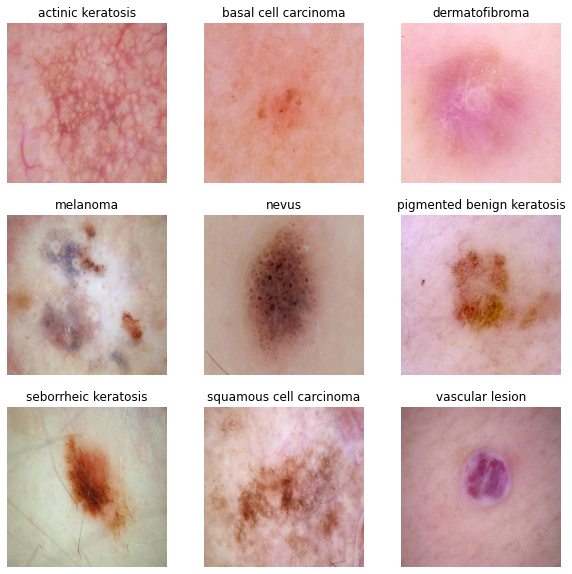

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
i=0
for k in class_names:
  for img, labels in train_ds.unbatch().take(1792):
    if class_names[labels] == k:
      i=i+1
      ax = plt.subplot(3, 3, i)
      plt.imshow(img.numpy().astype("uint8"))
      plt.title(class_names[labels])
      plt.axis("off")
      break

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [12]:
### Your code goes here
n_class = 9

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_width,img_height,3)),

  layers.Conv2D(16, 3, padding = 'same',activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(32, 3,padding = 'same', activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(64, 3,padding = 'same', activation='relu'),
  layers.Conv2D(64, 3,padding = 'same', activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_class, activation='softmax')
])

## Compile the model
#### Choose an appropirate optimiser and loss function for model training

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 486s 2s/step - loss: 2.0200 - accuracy: 0.2439 - val_loss: 1.7849 - val_accuracy: 0.4161
Epoch 2/20
56/56 [==============================] - 3s 58ms/step - loss: 1.6420 - accuracy: 0.4124 - val_loss: 1.5096 - val_accuracy: 0.4653
Epoch 3/20
56/56 [==============================] - 3s 57ms/step - loss: 1.4698 - accuracy: 0.4916 - val_loss: 1.4195 - val_accuracy: 0.5168
Epoch 4/20
56/56 [==============================] - 3s 57ms/step - loss: 1.3767 - accuracy: 0.5106 - val_loss: 1.3799 - val_accuracy: 0.5034
Epoch 5/20
56/56 [==============================] - 3s 57ms/step - loss: 1.2990 - accuracy: 0.5318 - val_loss: 1.3977 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 3s 57ms/step - loss: 1.2444 - accuracy: 0.5658 - val_loss: 1.3477 - val_accuracy: 0.5526
Epoch 7/20
56/56 [==============================] - 3s 57ms/step - loss: 1.1945 - accuracy: 0.5720 - val_loss: 1.4299 - val_accuracy: 0.5324
Epoch 8/20
56/56 [======

## Visualizing training results

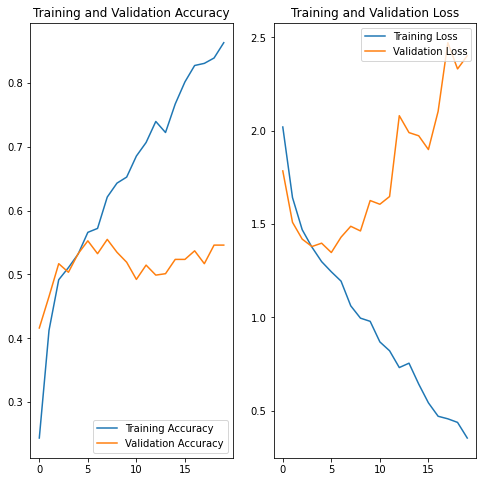

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit**

1. No matter the architecture of the network (no of layers, noof neurons in layers, dropout etc), model is overfitting.
2. The overfitting can be observed from the graph as well as the difference in the validation and training accuracies of the network trained.
3. The overfitting can occure generally due to smaller chunk of input data where the model learns from noisy details.
4. Data Augmentation helps in such cases. Data augmentation is basically adding more data by performing simple operations on the existing data.

### Write your findings here

In [17]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

augment_data = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

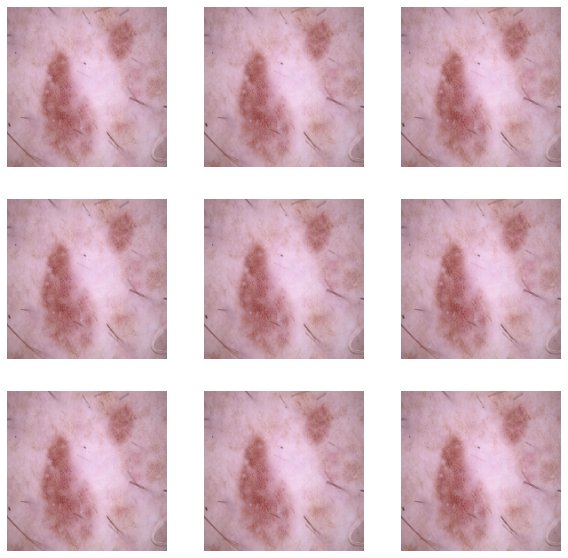

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = augment_data(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.axis("off")

### Create the model, compile and train the model

In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings
## Your code goes here

## The above model overfitted with/without the dropout layer. As there is clear evidence of overfitting, I am using dropout layer here.
model = Sequential([
  augment_data,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_class, activation= 'softmax')
])

### Compiling the model

In [20]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 5s 67ms/step - loss: 1.8126 - accuracy: 0.3404 - val_loss: 1.6462 - val_accuracy: 0.4519
Epoch 2/20
56/56 [==============================] - 4s 63ms/step - loss: 1.6045 - accuracy: 0.4275 - val_loss: 1.5507 - val_accuracy: 0.4944
Epoch 3/20
56/56 [==============================] - 4s 64ms/step - loss: 1.4915 - accuracy: 0.4609 - val_loss: 1.4779 - val_accuracy: 0.4832
Epoch 4/20
56/56 [==============================] - 4s 63ms/step - loss: 1.4409 - accuracy: 0.4955 - val_loss: 1.4740 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 1.4657 - accuracy: 0.4749 - val_loss: 1.4457 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 3s 62ms/step - loss: 1.4134 - accuracy: 0.4967 - val_loss: 1.4514 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 3s 63ms/step - loss: 1.3431 - accuracy: 0.5184 - val_loss: 1.3976 - val_accuracy: 0.5190
Epoch 8/20
56/56 [======

## Visualizing the results

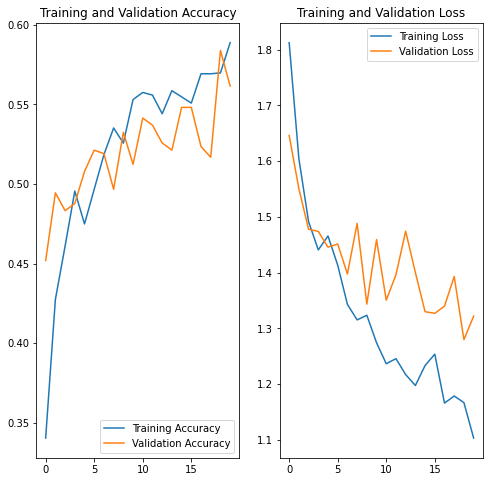

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

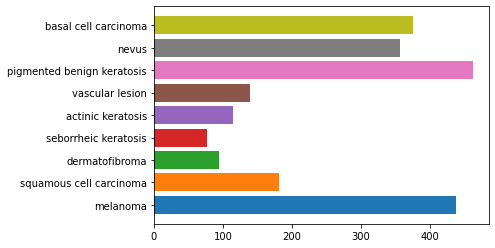

In [24]:
## Your code goes here.
import os
path = '/content/drive/MyDrive/Python/Test/Train'
mn = 0
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name))]) # get all directories 
for folder in folders:
    contents = os.listdir(os.path.join(path,folder)) # get list of contents
    if len(contents) >= mn: # if greater than the limit, print folder and number of contents
        plt.barh(folder,len(contents))

## Todo: Write your findings here:
**Which class has the least number of samples?**

"seborrheic keratosis"

**Which classes dominate the data in terms proportionate number of samples?**

"pigmented benign keratosis", "melanoma", "basal cell carcinoma", "nevus" (Decreasing order)

## Todo: Rectify the class imbalance

Context: You can use a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

In [26]:
# Commenting this code to avoid data multiplication in my "output" folders

path_to_training_dataset="/content/drive/MyDrive/Python/Test/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84DF28EC10>: 100%|██████████| 500/500 [00:23<00:00, 21.73 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F85500D9B90>: 100%|██████████| 500/500 [00:23<00:00, 20.85 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F84DEF50490>: 100%|██████████| 500/500 [00:25<00:00, 19.26 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F84639686D0>: 100%|██████████| 500/500 [01:54<00:00,  4.37 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F84DF061A50>: 100%|██████████| 500/500 [01:30<00:00,  5.53 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84DF315210>: 100%|██████████| 500/500 [00:19<00:00, 25.01 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F84DEF3D450>: 100%|██████████| 500/500 [00:47<00:00, 10.47 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F8550175550>: 100%|██████████| 500/500 [00:21<00:00, 23.39 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Python/Test/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F84DF274410>: 100%|██████████| 500/500 [00:21<00:00, 23.80 Samples/s]


In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [28]:
import glob

In [29]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Python/Test/Train/melanoma/output/melanoma_original_ISIC_0011136.jpg_7f8b4a07-eb20-4f71-ab5f-9a7d8dfae8bb.jpg',
 '/content/drive/MyDrive/Python/Test/Train/melanoma/output/melanoma_original_ISIC_0000310.jpg_d8557074-f1de-4f3e-a482-19ff27590271.jpg',
 '/content/drive/MyDrive/Python/Test/Train/melanoma/output/melanoma_original_ISIC_0000411.jpg_2a0b7d7d-9a3a-4a9b-add8-15021609a015.jpg',
 '/content/drive/MyDrive/Python/Test/Train/melanoma/output/melanoma_original_ISIC_0000164.jpg_073e5e90-c0e8-4613-9bf2-837c6e2b64f0.jpg',
 '/content/drive/MyDrive/Python/Test/Train/melanoma/output/melanoma_original_ISIC_0010165.jpg_d95fa182-6f86-4edf-ba11-529d4cf848c7.jpg',
 '/content/drive/MyDrive/Python/Test/Train/melanoma/output/melanoma_original_ISIC_0000295.jpg_a7e5d6b7-5286-4ca2-b677-f2797cadd970.jpg',
 '/content/drive/MyDrive/Python/Test/Train/melanoma/output/melanoma_original_ISIC_0010808.jpg_0c2b26f4-7c8c-4c0a-95b1-5c4897133658.jpg',
 '/content/drive/MyDrive/Python/Test/Trai

In [30]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',
 'melanoma',

In [31]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [32]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesson_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict = dict(zip(path_list, lesson_list))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [33]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

In [34]:
batch_size = 32
img_height = 180
img_width = 180

In [35]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset = 'training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [36]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [37]:
## your code goes here

n_class = 9

model = Sequential([
  augment_data,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(n_class, activation= 'softmax')
])

In [38]:
## your code goes here
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [39]:
epochs = 30
history = history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 60s 341ms/step - loss: 2.0494 - accuracy: 0.2042 - val_loss: 1.7703 - val_accuracy: 0.3586
Epoch 2/30
169/169 [==============================] - 38s 216ms/step - loss: 1.5861 - accuracy: 0.3887 - val_loss: 1.4981 - val_accuracy: 0.4395
Epoch 3/30
169/169 [==============================] - 39s 225ms/step - loss: 1.4653 - accuracy: 0.4347 - val_loss: 1.3641 - val_accuracy: 0.4662
Epoch 4/30
169/169 [==============================] - 37s 212ms/step - loss: 1.3986 - accuracy: 0.4549 - val_loss: 1.3766 - val_accuracy: 0.4744
Epoch 5/30
169/169 [==============================] - 38s 216ms/step - loss: 1.3363 - accuracy: 0.4894 - val_loss: 1.3039 - val_accuracy: 0.4959
Epoch 6/30
169/169 [==============================] - 37s 214ms/step - loss: 1.2835 - accuracy: 0.5007 - val_loss: 1.3654 - val_accuracy: 0.5056
Epoch 7/30
169/169 [==============================] - 37s 209ms/step - loss: 1.2460 - accuracy: 0.5122 - val_loss: 1.2450 - val_accuracy: 0.5

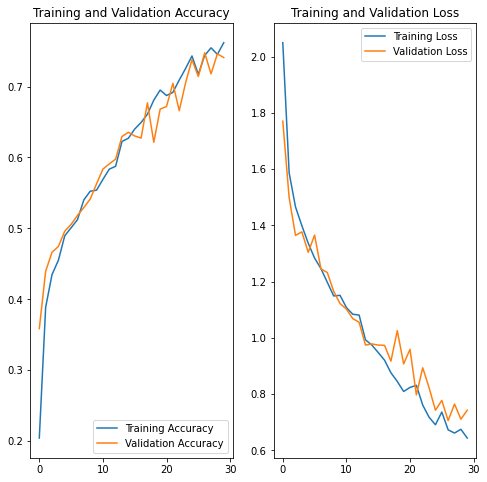

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Todo:** Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

*   The above results in graph and training data indicate that the accuracy has improved and that there is no overfitting of the model.[Training accuracy ~72%, validation accuracy ~71%]
*   Using augmentation helped in solving the issue of underfitting.
*   While using the class balancing, the accuracy of the model has improved significantly. So, it definitely helped.
*   Using both resulted in a much efficient model.
*   Also the results varied over multiple runs. There were instances with approximately 79-80% validation accuracy too. So, I'd say an average validation accuracy of 75% for this model.